# ARIMA Model for stock price prediction (Short Term)

RMSE: 2.82


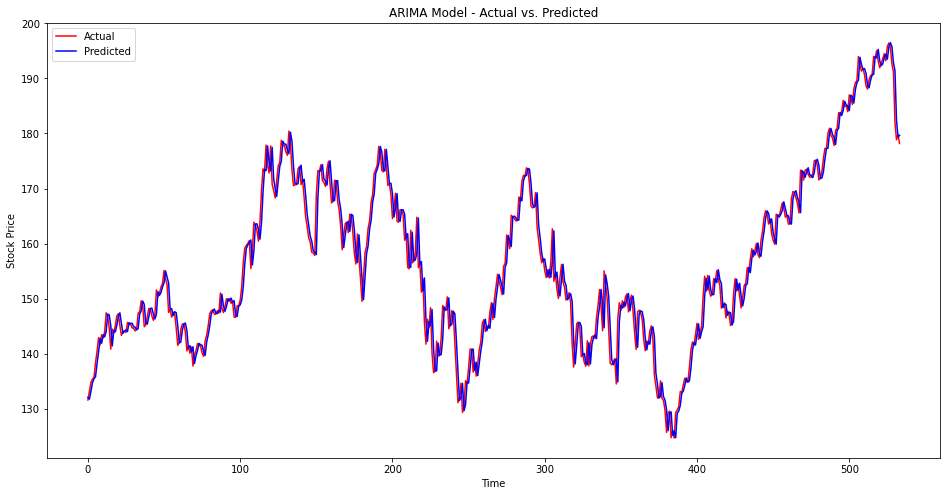

In [32]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Fetching the stock data using yfinance
ticker = yf.Ticker('AAPL')
df = ticker.history(interval='1d', start='2013-01-01')

# Selecting the 'Close' column for prediction
data = df['Close'].values

# Splitting the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Function to fit ARIMA model and make predictions
def fit_arima(train_data, order):
    history = [x for x in train_data]
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    return predictions

# Define the order for ARIMA model (p, d, q) (5, 1, 0)
p, d, q = 2, 2, 2

# Fit ARIMA model and make predictions
predictions = fit_arima(train, (p, d, q))

# Calculate Root Mean Squared Error (RMSE)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

# Plotting the actual and predicted prices
plt.figure(figsize=(16, 8))
plt.plot(test, color='red', label='Actual')
plt.plot(predictions, color='blue', label='Predicted')
plt.title('ARIMA Model - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [23]:
len(predictions)

282

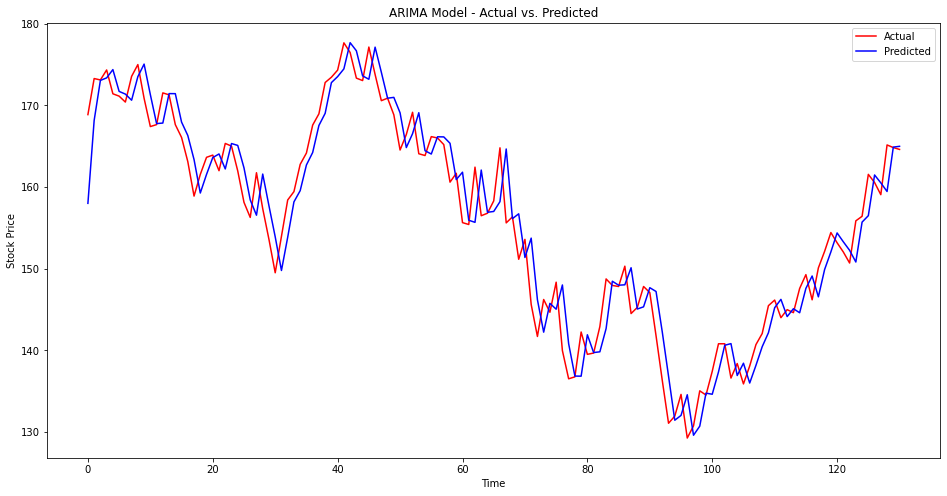

In [33]:
# Plotting the actual and predicted prices
plt.figure(figsize=(16, 8))
plt.plot(test[150:281], color='red', label='Actual')
plt.plot(predictions[150:281], color='blue', label='Predicted')
plt.title('ARIMA Model - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

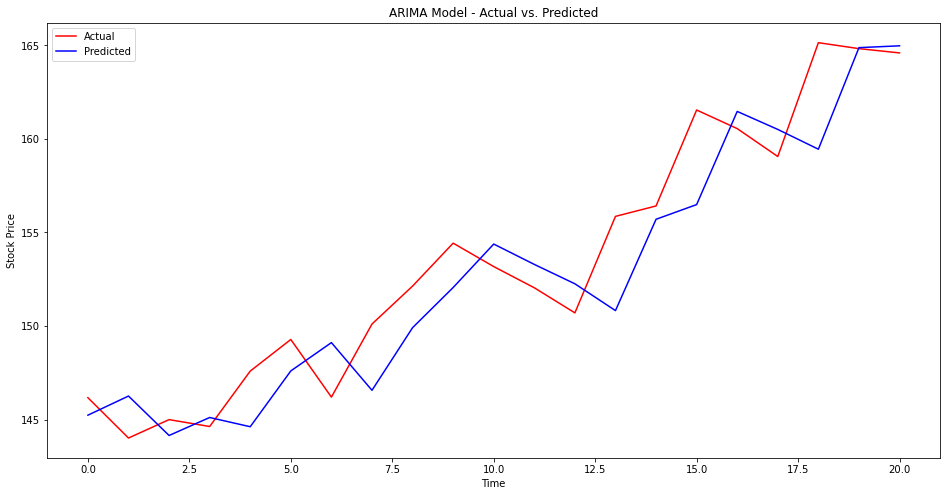

In [34]:
# Plotting the actual and predicted prices
plt.figure(figsize=(16, 8))
plt.plot(test[260:281], color='red', label='Actual')
plt.plot(predictions[260:281], color='blue', label='Predicted')
plt.title('ARIMA Model - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Prices for next 30 days 

In [2]:
# !pip install joblib

C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\st

RMSE: 2.71


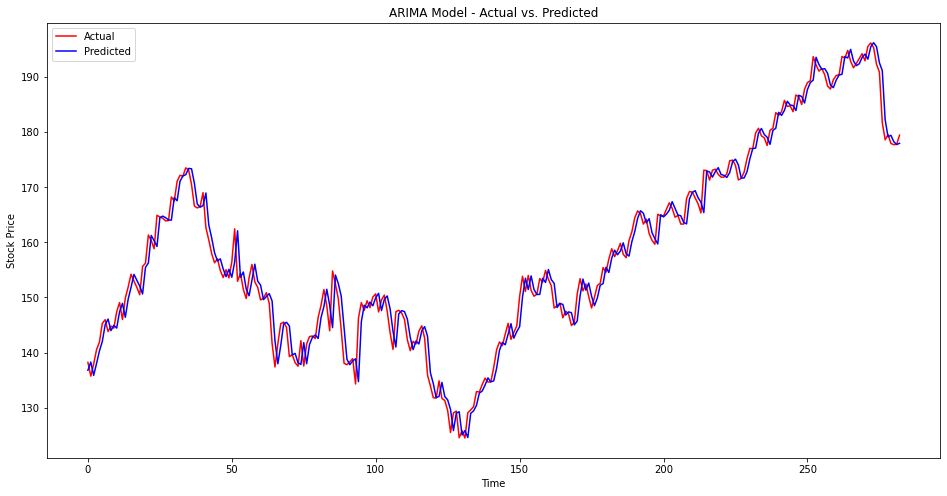

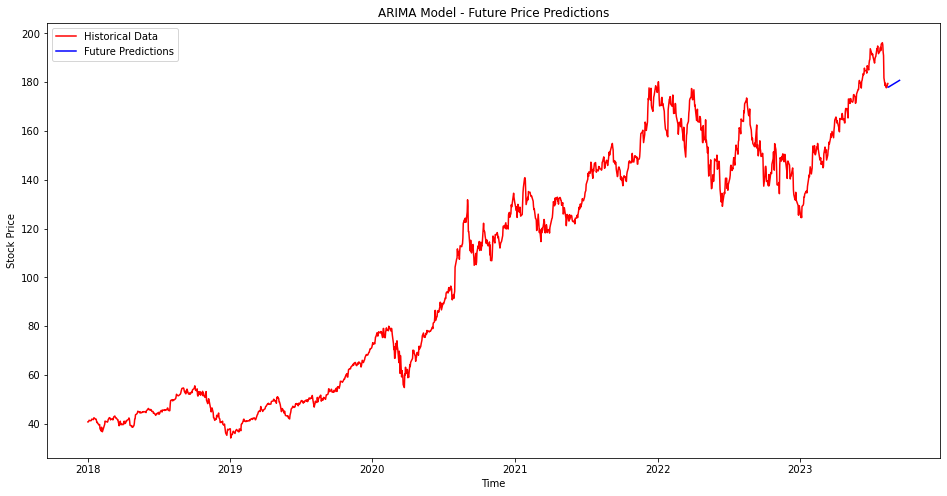

In [13]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import joblib

# Fetching the stock data using yfinance
ticker = yf.Ticker('AAPL')
df = ticker.history(interval='1d', start='2018-01-01')

# Selecting the 'Close' column for prediction
data = df['Close'].values

# Splitting the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Function to fit ARIMA model and make predictions
def fit_arima(train_data, order):
    history = [x for x in train_data]
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    return predictions, model_fit

# Define the order for ARIMA model (p, d, q) (5, 1, 0)
p, d, q = 2, 2, 2

# Fit ARIMA model and make predictions
predictions, trained_model = fit_arima(train, (p, d, q))

# Calculate Root Mean Squared Error (RMSE)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

# Plotting the actual and predicted prices
plt.figure(figsize=(16, 8))
plt.plot(test, color='red', label='Actual')
plt.plot(predictions, color='blue', label='Predicted')
plt.title('ARIMA Model - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Save the trained model to a file using joblib
joblib.dump(trained_model, 'arima_model.joblib')

# Load the saved model from file
loaded_model = joblib.load('arima_model.joblib')

# Get user input for predicting prices for the next n days
n = 30

# Make predictions for the next n days
future_predictions = loaded_model.forecast(steps=n)

# Generate date range for the next n days
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=n)

# Plotting the future predicted prices
plt.figure(figsize=(16, 8))
plt.plot(df.index, data, color='red', label='Historical Data')
plt.plot(future_dates, future_predictions, color='blue', label='Future Predictions')
plt.title('ARIMA Model - Future Price Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Only the predicted price

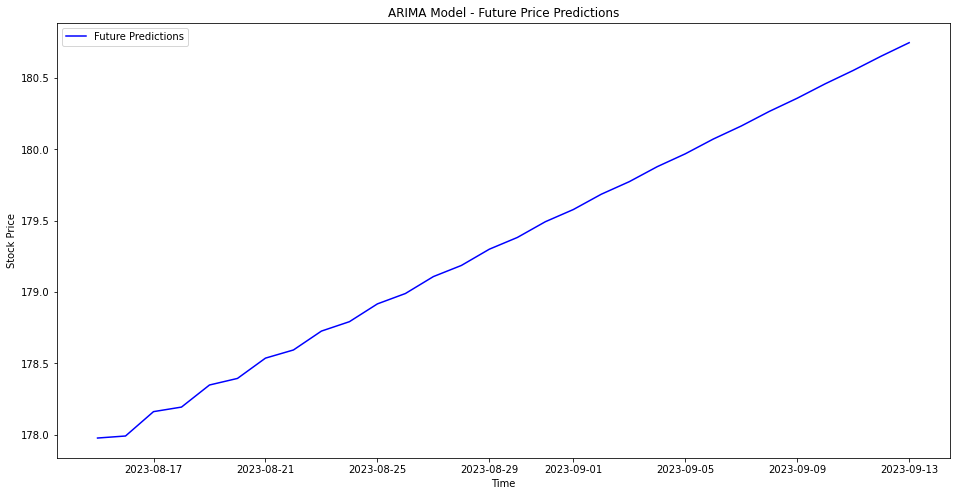

In [14]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import joblib

# Load the saved model from file
loaded_model = joblib.load('arima_model.joblib')

# Get user input for predicting prices for the next n days
n = 30

# Make predictions for the next n days
future_predictions = loaded_model.forecast(steps=n)

# Generate date range for the next n days
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=n)

# Plotting the future predicted prices
plt.figure(figsize=(16, 8))
plt.plot(future_dates, future_predictions, color='blue', label='Future Predictions')
plt.title('ARIMA Model - Future Price Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()